<a href="https://colab.research.google.com/github/hvr2026/Decision-trees/blob/main/Random%20Forest/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score, precision_recall_curve
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

In [ ]:
# Inspect the data
print("Dataset shape:", diabetes_data.shape)
print("First few rows of the dataset:")
display(diabetes_data.head())

Dataset shape: (15000, 10)
First few rows of the dataset:


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
# Separate features and target
X = diabetes_data.drop(columns=["PatientID", "Diabetic"])
y = diabetes_data["Diabetic"]

In [ ]:

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Define and train Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Predictions
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)


In [ ]:
# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9656666666666667
Testing Accuracy: 0.9303333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2000
           1       0.91      0.88      0.89      1000

    accuracy                           0.93      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.93      0.93      0.93      3000



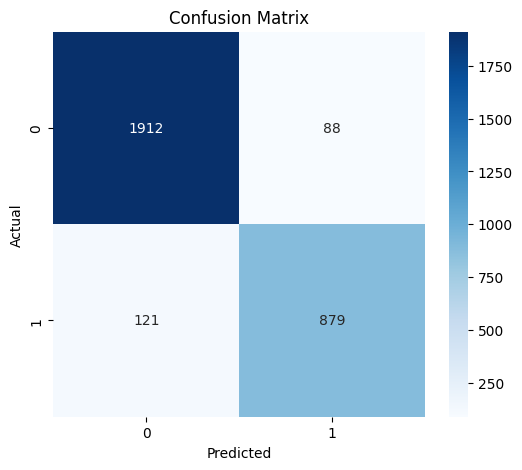

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:

# ROC Curve
y_test_proba = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

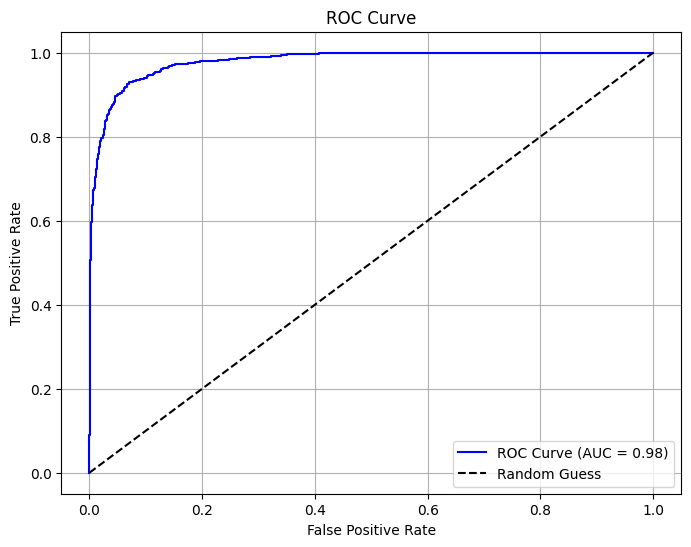

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

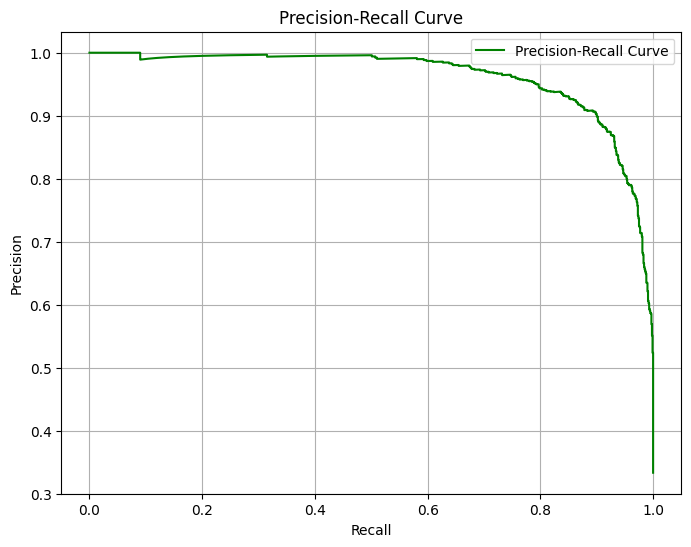

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


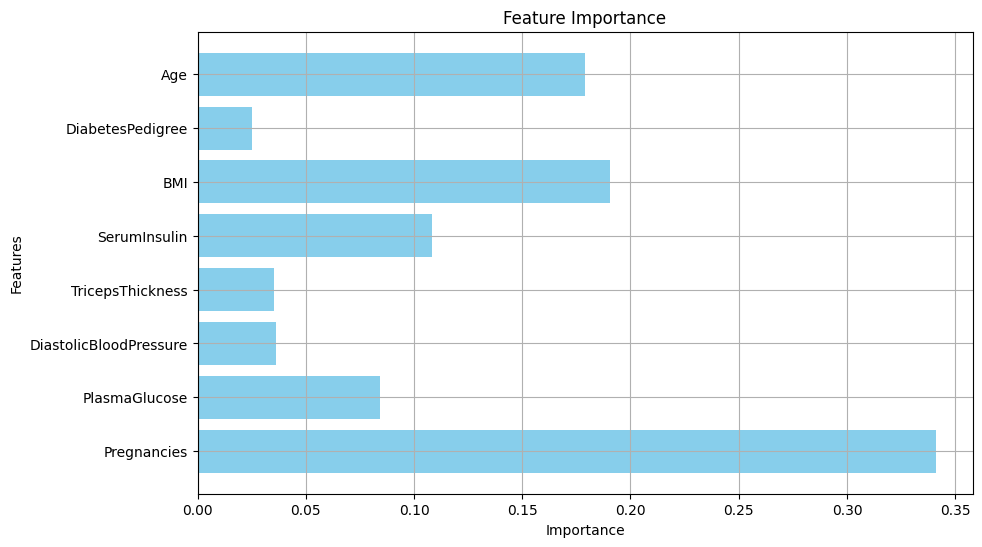

In [ ]:
# Feature Importance
feature_importance = rf_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color="skyblue")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid()
plt.show()

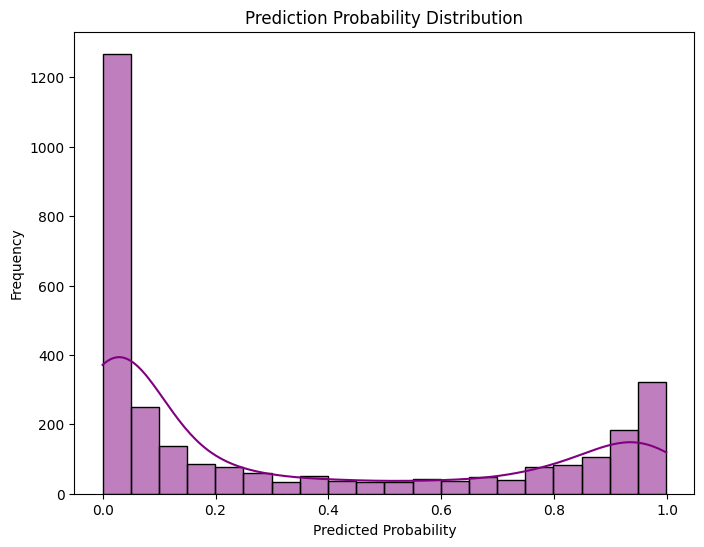

In [ ]:
# Prediction Distribution
plt.figure(figsize=(8, 6))
sns.histplot(y_test_proba, kde=True, color="purple", bins=20)
plt.title("Prediction Probability Distribution")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters from Grid Search:", grid_search.best_params_)
best_rf_clf = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters from Grid Search: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
# Reevaluate the tuned model
y_test_pred_tuned = best_rf_clf.predict(X_test)
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_test_pred_tuned))


Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2000
           1       0.91      0.89      0.90      1000

    accuracy                           0.94      3000
   macro avg       0.93      0.92      0.93      3000
weighted avg       0.94      0.94      0.94      3000



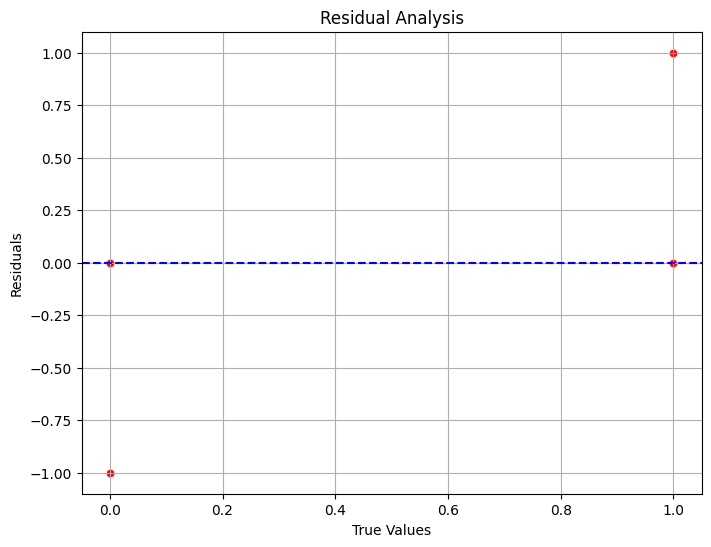

In [ ]:
# Error Analysis
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, color="red")
plt.axhline(0, color="blue", linestyle="--")
plt.title("Residual Analysis")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()